In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum().sum()  #checking missing values

np.int64(0)

In [ ]:
df.duplicated().sum()   #check duplicate values

np.int64(0)

In [ ]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df =pd.get_dummies(df,columns=["Geography", "Gender"], drop_first=True)
df = df.astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [ ]:
x = df.drop(columns=["Exited"])
y = df["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(5,activation="sigmoid", input_dim=11))
model.add(Dense(7, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110 (440.00 B)

 Trainable params: 110 (440.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
final_model = model.fit(x_train, y_train, batch_size=50, epochs=20, validation_split=0.2)


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5397 - loss: 0.6769 - val_accuracy: 0.7987 - val_loss: 0.5343
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7888 - loss: 0.5259 - val_accuracy: 0.7987 - val_loss: 0.4811
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7883 - loss: 0.4902 - val_accuracy: 0.7987 - val_loss: 0.4569
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.4623 - val_accuracy: 0.8025 - val_loss: 0.4399
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8011 - loss: 0.4388 - val_accuracy: 0.8131 - val_loss: 0.4288
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8107 - loss: 0.4284 - val_accuracy: 0.8225 - val_loss: 0.4223
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8048 - loss: 0.4312 - val_accuracy: 0.8244 - val_loss: 0.4172
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8004 - loss: 0.4343 - val_accuracy: 0.

In [ ]:
model.layers[2].get_weights()

[array([[-0.09376037],
        [-0.65122366],
        [ 0.9792025 ],
        [ 0.993814  ],
        [ 1.632296  ],
        [ 1.1195883 ],
        [-1.3005542 ]], dtype=float32),
 array([-0.1389278], dtype=float32)]

In [ ]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred

array([[0.09696641],
       [0.05777314],
       [0.27867383],
       ...,
       [0.5351004 ],
       [0.10791326],
       [0.21535239]], dtype=float32)

In [ ]:
y_pred = np.where(y_pred>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8505

In [ ]:
final_model.history

{'accuracy': [0.6982812285423279,
  0.7934374809265137,
  0.7934374809265137,
  0.793749988079071,
  0.7970312237739563,
  0.8031250238418579,
  0.8034374713897705,
  0.8068749904632568,
  0.8081250190734863,
  0.8104687333106995,
  0.8106250166893005,
  0.8137500286102295,
  0.8165624737739563,
  0.8206250071525574,
  0.824999988079071,
  0.8287500143051147,
  0.8364062309265137,
  0.8385937213897705,
  0.8442187309265137,
  0.8470312356948853],
 'loss': [0.6234443187713623,
  0.5098534822463989,
  0.4791117012500763,
  0.4597291946411133,
  0.4458872079849243,
  0.43742382526397705,
  0.43201062083244324,
  0.4274404048919678,
  0.4240853190422058,
  0.42052870988845825,
  0.4165840446949005,
  0.4126751720905304,
  0.40856730937957764,
  0.4038843810558319,
  0.3991791605949402,
  0.3944128453731537,
  0.3893381953239441,
  0.3844233751296997,
  0.38000115752220154,
  0.3752041161060333],
 'val_accuracy': [0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.802500009

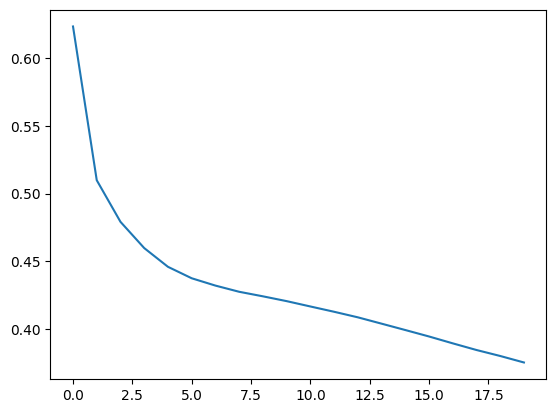

In [ ]:
import matplotlib.pyplot as plt
plt.plot(final_model.history["loss"])

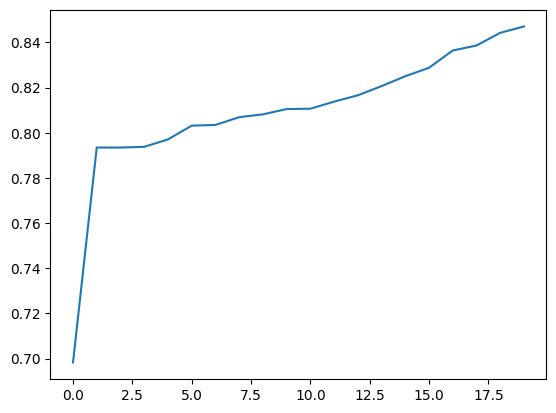

In [ ]:
plt.plot(final_model.history["accuracy"])